<a href="https://colab.research.google.com/github/to6ksu3a/bank-credit-risk-ML/blob/main/Bank_Credit_Risk_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Оценка кредитного риска - анализ и построение ML-модели

**Автор**: Колпакова Ксения

**Дата**: октябрь 2025

**Цели работы**:
- Прогнозирование кредитного дефолта - определение клиентов, у которых возникнет серьезная просрочка по кредиту (>90 дней)
- Исследование факторов риска - выявление наиболее значимых признаков, влияющих на вероятность дефолта

**Источник датасета**: [Kaggle - Bank credit risk assessment](https://www.kaggle.com/datasets/kapturovalexander/bank-credit-risk-assessment)

Для обеспечения надежности и доступности данных их чтение осуществляется по ссылке на мой GitHub.


##1. Импорт бибилотек

In [3]:
from datetime import datetime
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, precision_recall_curve, roc_auc_score, auc, accuracy_score
from imblearn.over_sampling import RandomOverSampler

## 2. Загрузка датасета

In [4]:
try:
  df = pd.read_excel('https://github.com/to6ksu3a/bank-credit-risk-ML/raw/refs/heads/main/bank_credit_scoring.xlsx')
  print('Файл успешно загружен')
except Exception as e:
  raise Exception(f"Не удалось загрузить файл 'bank_credit_scoring.xlsx'. Ошибка: {e}")

Файл успешно загружен


## 3. EDA

In [5]:
df.shape

(18420, 18)

In [6]:
df.head()

,Задолженность,"Просрочка, дни",Первоначльный лимит,BIRTHDATE,SEX,EDU,INCOME,TERM,Рейтинг кредитной истории,LV_AREA,LV_SETTLEMENTNAME,INDUSTRYNAME,PDN,CLIENTID,SCORINGMARK,UNDERAGECHILDRENCOUNT,VELCOMSCORING,FAMILYSTATUS
0,6063.50,3,7000.0,1983-07-08,Мужской,Среднее специальное,703.07,60,A1,Гомельская область,КОСАКОВКА,АПК,0.98,919517,233.0,0,NaN,1
1,3765.04,0,5000.0,1987-12-19,Женский,Высшее,1693.68,60,B2,NaN,МИНСК,Финансы и страхование,0.17,539353,NaN,1,NaN,1
2,2067.66,0,2650.0,1966-02-28,Женский,Среднее,724.49,60,C2,ГРОДНЕНСКАЯ,ЁДКИ,Медицина и здравоохранение,0.40,818913,NaN,0,NaN,2
3,2370.39,0,3000.0,1972-02-18,Женский,Среднее специальное,1045.84,60,A3,МИНСКАЯ,ФАНИПОЛЬ,Государственное управление,0.29,691598,216.0,0,NaN,2
4,2280.55,0,3000.0,1997-02-23,Женский,Высшее,1092.65,60,B3,NaN,Минск,Медицина и здравоохранение,0.63,425193,NaN,0,NaN,2


In [7]:
df.tail()

,Задолженность,"Просрочка, дни",Первоначльный лимит,BIRTHDATE,SEX,EDU,INCOME,TERM,Рейтинг кредитной истории,LV_AREA,LV_SETTLEMENTNAME,INDUSTRYNAME,PDN,CLIENTID,SCORINGMARK,UNDERAGECHILDRENCOUNT,VELCOMSCORING,FAMILYSTATUS
18415,0.0,0,10850.0,1999-11-08,Мужской,Высшее,3563.75,60,B1,г. Минск,МИНСК,Информационные технологии,0.40,687867,344.0,0,-2.0,1
18416,0.0,0,13000.0,1993-06-03,Мужской,Среднее специальное,2865.72,36,NaN,Минская область,Жалы,Строительство,0.19,984627,108.0,2,-2.0,1
18417,0.0,0,3500.0,2002-11-05,Мужской,Среднее специальное,3363.05,24,C2,Минская область,Солигорск,Строительство,0.19,1060373,129.0,0,-2.0,2
18418,0.0,0,10000.0,2003-09-15,Мужской,Среднее,1670.13,60,C1,г. Минск,МИНСК,Торговля,0.28,1056128,179.0,0,-2.0,2
18419,0.0,0,1500.0,1994-01-14,Мужской,Высшее,3517.90,60,C1,Брестская область,КОБРИН,МВД/МЧС/МО,0.26,1061453,269.0,0,-2.0,2


In [8]:
df.columns.values

array(['Задолженность', 'Просрочка, дни', 'Первоначльный лимит',
       'BIRTHDATE', 'SEX', 'EDU', 'INCOME', 'TERM',
       'Рейтинг кредитной истории', 'LV_AREA', 'LV_SETTLEMENTNAME',
       'INDUSTRYNAME', 'PDN', 'CLIENTID', 'SCORINGMARK',
       'UNDERAGECHILDRENCOUNT', 'VELCOMSCORING', 'FAMILYSTATUS'],
      dtype=object)

In [9]:
df.dtypes

,0
Задолженность,float64
"Просрочка, дни",int64
Первоначльный лимит,float64
BIRTHDATE,datetime64[ns]
SEX,object
EDU,object
INCOME,float64
TERM,int64
Рейтинг кредитной истории,object
LV_AREA,object


Таким образом, всего имеется 18 характеристик и 18420 наблюдений

* `Задолженность` - общая сумма непогашенной задолженности клиента
* `Просрочка, дни` - количество дней просрочки платежа
* `Первоначальный лимит` - первоначальный кредитный лимит, назначенный клиенту
* `BIRTHDATE` - дата рождения клиента
* `SEX` - пол клиента
* `EDU` - уровень образования клиента
* `INCOME` - ежемесячный доход клиента
* `TERM` - срок действия займа или кредитного соглашения в месяцах
* `Рейтинг кредитной истории` - балл, отражающий кредитную историю клиента
* `LV_AREA` - регион или область, где проживает клиент
* `LV_SETTLEMENTNAME` - название города, поселка или населенного пункта, в котором проживает клиент
* `INDUSTRYNAME` - отрасль или сектор, в котором работает клиент
* `PDN` - показатель долговой нагрузки, представляет собой отношение суммы всех ежемесячных платежей по кредитам к ежемесячному доходу заёмщика. Оптимальным считается коэффициент долговой нагрузки до 30% — это позволяет заёмщику и выплачивать долг по кредиту, и сохранять привычный уровень жизни. Предельно допустимая величина ПДН — 50%, всё, что идёт свыше — причина для отказа в выдаче нового кредита.
* `CLIENTID` - уникальный идентификатор клиента
* `SCORINGMARK` - оценка кредитоспособности
* `UNDERAGECHILDRENCOUNT` - колмчество несовершеннолетних детей у клиента
* `VELCOMSCORING` - специальный показатель (возможно, связанный с телекоммуникациями, т.к. Velcom - провайдер в Беларуси), используемый при оценке рисков
* `FAMILYSTATUS` - семейное положение клиента

### Обработка датасета

Для удобства и унифицированного вида преобразуем название столбцов:

In [10]:
data = df.rename(columns={
    'Задолженность': 'Debt',
    'Просрочка, дни': 'Overdue_Days',
    'Первоначльный лимит': 'Initial_Limit',
    'BIRTHDATE': 'Birth_Date',
    'SEX': 'Sex',
    'EDU': 'Education',
    'INCOME': 'Income',
    'TERM': 'Loan_Term',
    'Рейтинг кредитной истории': 'Credit_History_Rating',
    'LV_AREA': 'Living_Area',
    'LV_SETTLEMENTNAME': 'Settlement_Name',
    'INDUSTRYNAME': 'Industry_Name',
    'PDN': 'Payment_To_Income_Ratio',
    'CLIENTID': 'Client_ID',
    'SCORINGMARK': 'Scoring_Mark',
    'UNDERAGECHILDRENCOUNT': 'Underage_Children_Count',
    'VELCOMSCORING': 'Velcom_Scoring',
    'FAMILYSTATUS': 'Family_Status'
})

In [11]:
data.head()

,Debt,Overdue_Days,Initial_Limit,Birth_Date,Sex,Education,Income,Loan_Term,Credit_History_Rating,Living_Area,Settlement_Name,Industry_Name,Payment_To_Income_Ratio,Client_ID,Scoring_Mark,Underage_Children_Count,Velcom_Scoring,Family_Status
0,6063.50,3,7000.0,1983-07-08,Мужской,Среднее специальное,703.07,60,A1,Гомельская область,КОСАКОВКА,АПК,0.98,919517,233.0,0,NaN,1
1,3765.04,0,5000.0,1987-12-19,Женский,Высшее,1693.68,60,B2,NaN,МИНСК,Финансы и страхование,0.17,539353,NaN,1,NaN,1
2,2067.66,0,2650.0,1966-02-28,Женский,Среднее,724.49,60,C2,ГРОДНЕНСКАЯ,ЁДКИ,Медицина и здравоохранение,0.40,818913,NaN,0,NaN,2
3,2370.39,0,3000.0,1972-02-18,Женский,Среднее специальное,1045.84,60,A3,МИНСКАЯ,ФАНИПОЛЬ,Государственное управление,0.29,691598,216.0,0,NaN,2
4,2280.55,0,3000.0,1997-02-23,Женский,Высшее,1092.65,60,B3,NaN,Минск,Медицина и здравоохранение,0.63,425193,NaN,0,NaN,2


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18420 entries, 0 to 18419
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Debt                     18420 non-null  float64       
 1   Overdue_Days             18420 non-null  int64         
 2   Initial_Limit            18420 non-null  float64       
 3   Birth_Date               18420 non-null  datetime64[ns]
 4   Sex                      18420 non-null  object        
 5   Education                18420 non-null  object        
 6   Income                   18420 non-null  float64       
 7   Loan_Term                18420 non-null  int64         
 8   Credit_History_Rating    17488 non-null  object        
 9   Living_Area              16297 non-null  object        
 10  Settlement_Name          18374 non-null  object        
 11  Industry_Name            18420 non-null  object        
 12  Payment_To_Income_Ratio  18420 n

In [13]:
data.nunique()

,0
Debt,9071
Overdue_Days,24
Initial_Limit,459
Birth_Date,9131
Sex,2
Education,5
Income,15376
Loan_Term,6
Credit_History_Rating,16
Living_Area,30


In [14]:
categorical_columns = ['Sex', 'Education', 'Living_Area', 'Settlement_Name', 'Industry_Name', 'Loan_Term', 'Family_Status']
for col in categorical_columns:
  print(col, ':', data[col].unique())

Sex : ['Мужской' 'Женский']
Education : ['Среднее специальное' 'Высшее' 'Среднее' 'Неоконченное высшее'
 '**Послевузовское']
Living_Area : ['Гомельская область' nan 'ГРОДНЕНСКАЯ' 'МИНСКАЯ' 'БРЕСТСКАЯ' 'г. Минск'
 'ГОМЕЛЬСКАЯ' 'Минская область' 'Брестская область' 'Гродненская область'
 'Могилевская область' 'Витебская область' 'Г. МИНСК' 'ВИТЕБСКАЯ ОБЛАСТЬ'
 'ВИТЕБСКАЯ' 'Могилевская' 'МОГИЛЕВСКАЯ' 'МИНСКАЯ ОБЛАСТЬ'
 'ГОМЕЛЬСКАЯ ОБЛАСТЬ' 'МОГИЛЁВСКАЯ' 'Минская' 'БРЕСТСКАЯ ОБЛАСТЬ'
 'ГРОДНЕНСКАЯ ОБЛАСТЬ' 'МОГИЛЕВСКАЯ ОБЛАСТЬ' 'Витебская' 'Гомельская'
 'МИНСК' 'Брестская' 'Гродненская' 'ГОМЕЛЬСКАЯ ОБЛ' 'МОГИЛЕВСК']
Settlement_Name : ['КОСАКОВКА' 'МИНСК' 'ЁДКИ' ... 'ДИВИН' 'Копцевичи' 'Жалы']
Industry_Name : ['АПК' 'Финансы и страхование' 'Медицина и здравоохранение'
 'Государственное управление' 'Производство' 'Услуги населению'
 'Строительство' 'Торговля' 'Информационные технологии'
 'Транспорт/перевозки' 'Иное' 'Наука и образование' 'Спорт и туризм'
 'МВД/МЧС/МО' 'Культура и искусство' 

Эти признаки позже преобразуем в тип category

### Обработка данных о месте жительства (столбцы `Living_Area` и `Settlement_Name`)

In [15]:
data['Living_Area'].unique()

array(['Гомельская область', nan, 'ГРОДНЕНСКАЯ', 'МИНСКАЯ', 'БРЕСТСКАЯ',
       'г. Минск', 'ГОМЕЛЬСКАЯ', 'Минская область', 'Брестская область',
       'Гродненская область', 'Могилевская область', 'Витебская область',
       'Г. МИНСК', 'ВИТЕБСКАЯ ОБЛАСТЬ', 'ВИТЕБСКАЯ', 'Могилевская',
       'МОГИЛЕВСКАЯ', 'МИНСКАЯ ОБЛАСТЬ', 'ГОМЕЛЬСКАЯ ОБЛАСТЬ',
       'МОГИЛЁВСКАЯ', 'Минская', 'БРЕСТСКАЯ ОБЛАСТЬ',
       'ГРОДНЕНСКАЯ ОБЛАСТЬ', 'МОГИЛЕВСКАЯ ОБЛАСТЬ', 'Витебская',
       'Гомельская', 'МИНСК', 'Брестская', 'Гродненская',
       'ГОМЕЛЬСКАЯ ОБЛ', 'МОГИЛЕВСК'], dtype=object)

In [16]:
living_area_map = {
    'ГОМЕЛЬСКАЯ': 'Гомельская область',
    'ГОМЕЛЬСКАЯ ОБЛАСТЬ': 'Гомельская область',
    'Гомельская': 'Гомельская область',
    'ГОМЕЛЬСКАЯ ОБЛ': 'Гомельская область',

    'ГРОДНЕНСКАЯ': 'Гродненская область',
    'Гродненская': 'Гродненская область',
    'ГРОДНЕНСКАЯ ОБЛАСТЬ': 'Гродненская область',

    'МИНСКАЯ': 'Минская область',
    'Минская': 'Минская область',
    'МИНСКАЯ ОБЛАСТЬ': 'Минская область',

    'БРЕСТСКАЯ': 'Брестская область',
    'Брестская': 'Брестская область',
    'БРЕСТСКАЯ ОБЛАСТЬ': 'Брестская область',

    'МОГИЛЕВСКАЯ': 'Могилевская область',
    'МОГИЛЕВСКАЯ ОБЛАСТЬ': 'Могилевская область',
    'МОГИЛЁВСКАЯ': 'Могилевская область',
    'Могилевская': 'Могилевская область',
    'МОГИЛЕВСК': 'Могилевская область',

    'ВИТЕБСКАЯ ОБЛАСТЬ': 'Витебская область',
    'ВИТЕБСКАЯ': 'Витебская область',
    'Витебская': 'Витебская область',

    'Г. МИНСК': 'г. Минск',
    'МИНСК': 'г. Минск'

}

data['Living_Area'] = data['Living_Area'].replace(living_area_map)

In [17]:
data['Settlement_Name'].unique()

array(['КОСАКОВКА', 'МИНСК', 'ЁДКИ', ..., 'ДИВИН', 'Копцевичи', 'Жалы'],
      dtype=object)

In [18]:
def normalize_city_name(name):
    if pd.isna(name):
        return name
    name = str(name).lower().strip().title()

    return name

data['Settlement_Name'] = data['Settlement_Name'].apply(normalize_city_name)

In [19]:
top_cities = data['Settlement_Name'].value_counts().head(10)
top_cities

,count
Settlement_Name,
Минск,5043
Могилев,780
Гомель,751
Витебск,676
Брест,541
Гродно,505
Борисов,290
Барановичи,248
Бобруйск,239


### Создание новых признаков

Преобразуем `Birth_Date` в новый признак - возраст `Age`

In [20]:
current_year = datetime.now().year
data['Birth_Year'] = pd.to_datetime(data['Birth_Date']).dt.year
data['Age'] = current_year - data['Birth_Year'] - 1

Пусть факт просрочки кредита будет определяться, если просрочка составляет больше 90 дней. Таким образом, создадим новый категориальный признак `Overdue`

In [21]:
data['Overdue'] = (data['Overdue_Days'] > 90).astype('int')
print(data['Overdue'].value_counts())

Overdue
0    17665
1      755
Name: count, dtype: int64


### Обработка пропущенных значений

In [22]:
data.isnull().sum()

,0
Debt,0
Overdue_Days,0
Initial_Limit,0
Birth_Date,0
Sex,0
Education,0
Income,0
Loan_Term,0
Credit_History_Rating,932
Living_Area,2123


In [23]:
cities_counts = data[data['Living_Area'].isna()]['Settlement_Name'].value_counts()
print("Города с пропущенной областью (по частоте):")
print(cities_counts)

Города с пропущенной областью (по частоте):
Settlement_Name
Минск             680
Могилев           353
Гомель            301
Витебск           268
Брест             230
Гродно            204
Ждановичи           6
Гатово              5
Жодино              2
Мачулищи            2
Зубки               2
Боровуха            2
Полоцк              1
Орешники            1
Каменец             1
Новополоцк          1
Ляды                1
Прилуки             1
Бобруйск            1
Жлобин              1
Дубровно            1
Красносельский      1
Орша                1
Быхов               1
Ельск               1
Квасовка            1
Солигорск           1
Свислочь            1
Борисов             1
Бегомль             1
Телеханы            1
Хорева              1
Могилёв             1
Тышковичи           1
Рымдюны             1
Селище              1
Лунин               1
Ореховка            1
Name: count, dtype: int64


In [24]:
print(f"Пропуски в Living_Area: {data['Living_Area'].isna().sum()}")

Пропуски в Living_Area: 2123


In [25]:
city_to_region = {
    'Минск': 'Минск',
    'Ждановичи': 'Минская область',
    'Гатово': 'Минская область',
    'Жодино': 'Минская область',
    'Мачулищи': 'Минская область',
    'Орешники': 'Минская область',
    'Ляды': 'Минская область',
    'Прилуки': 'Минская область',
    'Солигорск': 'Минская область',
    'Борисов': 'Минская область',
    'Бегомль': 'Минская область',

    'Гомель': 'Гомель',
    'Жлобин': 'Гомельская область',
    'Ельск': 'Гомельская область',
    'Ореховка': 'Гомельская область',

    'Брест': 'Брест',
    'Каменец': 'Брестская область',
    'Телеханы': 'Брестская область',
    'Тышковичи': 'Брестская область',
    'Селище': 'Брестская область',
    'Лунин': 'Брестская область',

    'Гродно': 'Гродно',
    'Красносельский': 'Гродненская область',
    'Квасовка': 'Гродненская область',
    'Свислочь': 'Гродненская область',
    'Рымдюны': 'Гродненская область',

    'Витебск': 'Витебск',
    'Зубки': 'Витебская область',
    'Боровуха': 'Витебская область',
    'Полоцк': 'Витебская область',
    'Новополоцк': 'Витебская область',
    'Дубровно': 'Витебская область',
    'Орша': 'Витебская область',
    'Хорева': 'Витебская область',

    'Могилев': 'Могилев',
    'Могилёв': 'Могилевская область',
    'Бобруйск': 'Могилевская область',
    'Быхов': 'Могилевская область'
}

mask = data['Living_Area'].isna() & data['Settlement_Name'].notna()
data.loc[mask, 'Living_Area'] = data.loc[mask, 'Settlement_Name'].replace(city_to_region)

print(f"Осталось пропусков: {data['Living_Area'].isna().sum()}")

Осталось пропусков: 42


In [26]:
most_common_region = data['Living_Area'].mode()[0]
data['Living_Area'] = data['Living_Area'].fillna(most_common_region)

In [27]:
data.dropna(subset=['Credit_History_Rating'], inplace=True)

In [28]:
data.dropna(subset=['Scoring_Mark'], inplace=True)

Удалим признаки `Overdue_Days` и `Birth_Date` с `Birth_Year`, из которых ранее сформировали новые. Также удалим название города `Settlement_Name`, так как полностью заполнили столбец области проживания на его основе.  `Velcom_Scoring` имеет слишком много пропусков (42%), поэтому его так же имеет смысл убрать. `Client_ID` может запутать модель машинного обучения, из-за этого его тоже удалим

In [29]:
proccessed_data = data.drop(['Overdue_Days', 'Birth_Date', 'Settlement_Name',
                             'Client_ID', 'Velcom_Scoring', 'Birth_Year'], axis=1)
proccessed_data.head()

,Debt,Initial_Limit,Sex,Education,Income,Loan_Term,Credit_History_Rating,Living_Area,Industry_Name,Payment_To_Income_Ratio,Scoring_Mark,Underage_Children_Count,Family_Status,Age,Overdue
0,6063.50,7000.0,Мужской,Среднее специальное,703.07,60,A1,Гомельская область,АПК,0.98,233.0,0,1,41,0
3,2370.39,3000.0,Женский,Среднее специальное,1045.84,60,A3,Минская область,Государственное управление,0.29,216.0,0,2,52,0
5,839.91,1000.0,Мужской,Высшее,3341.23,60,C1,Брестская область,Производство,0.10,246.0,0,2,36,0
6,1065.19,2000.0,Женский,Высшее,983.60,24,C2,г. Минск,Услуги населению,0.25,74.0,1,2,34,0
7,2675.67,3000.0,Женский,Среднее специальное,1076.35,60,D1,Гомельская область,Производство,0.16,85.0,0,2,25,0


In [30]:
proccessed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15939 entries, 0 to 18419
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Debt                     15939 non-null  float64
 1   Initial_Limit            15939 non-null  float64
 2   Sex                      15939 non-null  object 
 3   Education                15939 non-null  object 
 4   Income                   15939 non-null  float64
 5   Loan_Term                15939 non-null  int64  
 6   Credit_History_Rating    15939 non-null  object 
 7   Living_Area              15939 non-null  object 
 8   Industry_Name            15939 non-null  object 
 9   Payment_To_Income_Ratio  15939 non-null  float64
 10  Scoring_Mark             15939 non-null  float64
 11  Underage_Children_Count  15939 non-null  int64  
 12  Family_Status            15939 non-null  int64  
 13  Age                      15939 non-null  int32  
 14  Overdue                  15

In [31]:
transform_columns = ['Sex', 'Education', 'Credit_History_Rating', 'Living_Area', 'Industry_Name']
for col in transform_columns:
    proccessed_data[col] = proccessed_data[col].astype('category')
    print(f"Преобразовано {col}: {data[col].nunique()} категорий")

Преобразовано Sex: 2 категорий
Преобразовано Education: 5 категорий
Преобразовано Credit_History_Rating: 16 категорий
Преобразовано Living_Area: 13 категорий
Преобразовано Industry_Name: 16 категорий


In [32]:
proccessed_data.isnull().sum()

,0
Debt,0
Initial_Limit,0
Sex,0
Education,0
Income,0
Loan_Term,0
Credit_History_Rating,0
Living_Area,0
Industry_Name,0
Payment_To_Income_Ratio,0


In [33]:
proccessed_data.head()

,Debt,Initial_Limit,Sex,Education,Income,Loan_Term,Credit_History_Rating,Living_Area,Industry_Name,Payment_To_Income_Ratio,Scoring_Mark,Underage_Children_Count,Family_Status,Age,Overdue
0,6063.50,7000.0,Мужской,Среднее специальное,703.07,60,A1,Гомельская область,АПК,0.98,233.0,0,1,41,0
3,2370.39,3000.0,Женский,Среднее специальное,1045.84,60,A3,Минская область,Государственное управление,0.29,216.0,0,2,52,0
5,839.91,1000.0,Мужской,Высшее,3341.23,60,C1,Брестская область,Производство,0.10,246.0,0,2,36,0
6,1065.19,2000.0,Женский,Высшее,983.60,24,C2,г. Минск,Услуги населению,0.25,74.0,1,2,34,0
7,2675.67,3000.0,Женский,Среднее специальное,1076.35,60,D1,Гомельская область,Производство,0.16,85.0,0,2,25,0


### Анализ статистических данных столбцов

In [34]:
proccessed_data.describe(include='category')

,Sex,Education,Credit_History_Rating,Living_Area,Industry_Name
count,15939,15939,15939,15939,15939
unique,2,5,16,13,16
top,Мужской,Среднее специальное,C1,г. Минск,Производство
freq,9694,8064,1900,4042,3836


In [35]:
proccessed_data.describe()

,Debt,Initial_Limit,Income,Loan_Term,Payment_To_Income_Ratio,Scoring_Mark,Underage_Children_Count,Family_Status,Age,Overdue
count,15939.000000,15939.000000,15939.000000,15939.000000,15939.000000,15939.000000,15939.000000,15939.000000,15939.000000,15939.000000
mean,4357.826845,5112.499404,1696.508456,52.148441,0.287975,188.246440,0.651609,1.487609,36.864797,0.039714
std,4404.579357,4935.570114,1054.307418,13.542928,0.132347,68.056176,0.858928,0.500489,10.150986,0.195292
min,0.000000,180.000000,0.000000,23.000000,0.000000,-108.000000,0.000000,1.000000,19.000000,0.000000
25%,1298.345000,1500.000000,1050.630000,36.000000,0.190000,135.000000,0.000000,1.000000,29.000000,0.000000
50%,2675.670000,3000.000000,1499.020000,60.000000,0.300000,185.000000,0.000000,1.000000,36.000000,0.000000
75%,5778.200000,6600.000000,2011.800000,60.000000,0.390000,237.000000,1.000000,2.000000,44.000000,0.000000
max,40000.000000,40000.000000,29942.820000,60.000000,1.210000,416.000000,3.000000,4.000000,68.000000,1.000000


**Портрет типичного клиента:** мужчина 35 лет со средним специальным образованием, работающий в производственной отрасли, живущий в Минске, с доходом ~1 500 и кредитным рейтингом C1. В то же время, можно увидеть наличие выбросов и дисбаланса (например, в доходе)

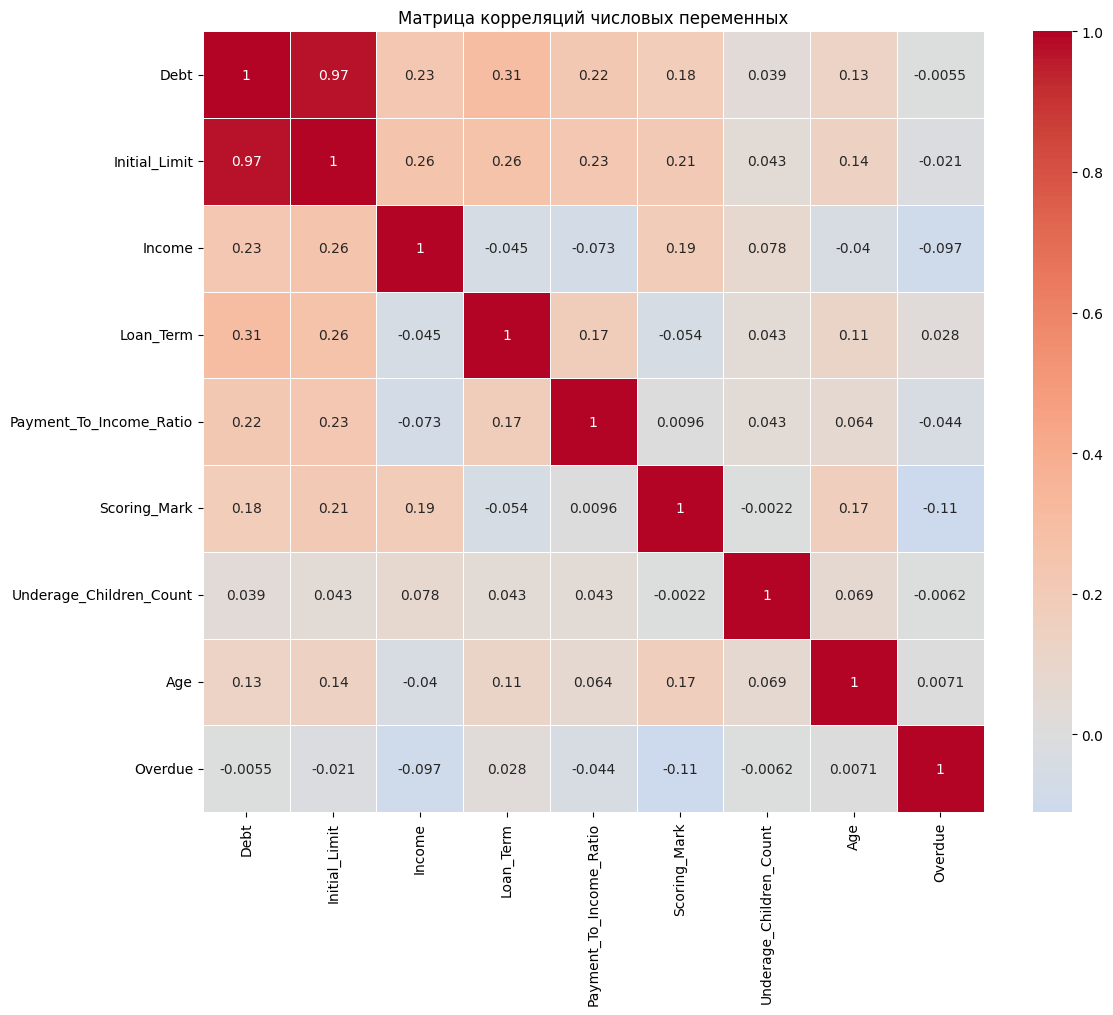

In [36]:
numerical_cols = ['Debt', 'Initial_Limit', 'Income', 'Loan_Term',
                  'Payment_To_Income_Ratio', 'Scoring_Mark',
                  'Underage_Children_Count', 'Age', 'Overdue']

plt.figure(figsize=(12, 10))
correlation_matrix = proccessed_data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Матрица корреляций числовых переменных')
plt.tight_layout()
plt.show()

Признаки долг `Debt` и первоначальный лимит `Initial_Limit` имеют сильную мультиколлинеарность, поэтому удалим `Initial_Limit`

In [37]:
proccessed_data.drop('Initial_Limit', axis=1, inplace=True)

### Кодировка признаков


In [38]:
le = LabelEncoder()
proccessed_data['Sex_encoded'] = le.fit_transform(proccessed_data['Sex'])

In [39]:
proccessed_data[['Sex', 'Sex_encoded']].value_counts()

,,count
Sex,Sex_encoded,
Мужской,1,9694
Женский,0,6245


In [40]:
proccessed_data.drop('Sex', axis=1, inplace=True)

In [41]:
education_categories = [['Среднее', 'Среднее специальное', 'Неоконченное высшее', 'Высшее', '**Послевузовское']]

ordinal_encoder = OrdinalEncoder(categories=education_categories)
proccessed_data['Education_encoded'] = ordinal_encoder.fit_transform(proccessed_data[['Education']])

In [42]:
proccessed_data[['Education', 'Education_encoded']].value_counts()

,,count
Education,Education_encoded,
Среднее специальное,1.0,8064
Высшее,3.0,5248
Среднее,0.0,2180
Неоконченное высшее,2.0,443
**Послевузовское,4.0,4


In [43]:
proccessed_data.drop('Education', axis=1, inplace=True)

In [44]:
rating_order = ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'D1', 'D2', 'D3', 'E1', 'E2', 'E3', '-1']

rating_categories = [rating_order]

ordinal_encoder = OrdinalEncoder(categories=rating_categories, dtype=int)
proccessed_data['Credit_Rating_encoded'] = ordinal_encoder.fit_transform(proccessed_data[['Credit_History_Rating']])

In [45]:
proccessed_data[['Credit_History_Rating', 'Credit_Rating_encoded']].value_counts().sort_index()

,,count
Credit_History_Rating,Credit_Rating_encoded,
-1,15,1
A1,0,692
A2,1,577
A3,2,869
B1,3,1183
B2,4,1481
B3,5,1860
C1,6,1900
C2,7,1822


In [46]:
proccessed_data.drop('Credit_History_Rating', axis=1, inplace=True)

In [47]:
living_area_dummies = pd.get_dummies(proccessed_data['Living_Area'])
industry_dummies = pd.get_dummies(proccessed_data['Industry_Name'])

In [48]:
proccessed_data.drop('Living_Area', axis=1, inplace=True)

In [49]:
proccessed_data.drop('Industry_Name', axis=1, inplace=True)

In [50]:
final_data = pd.concat([proccessed_data, living_area_dummies, industry_dummies], axis=1)

In [51]:
final_data.shape

(15939, 41)

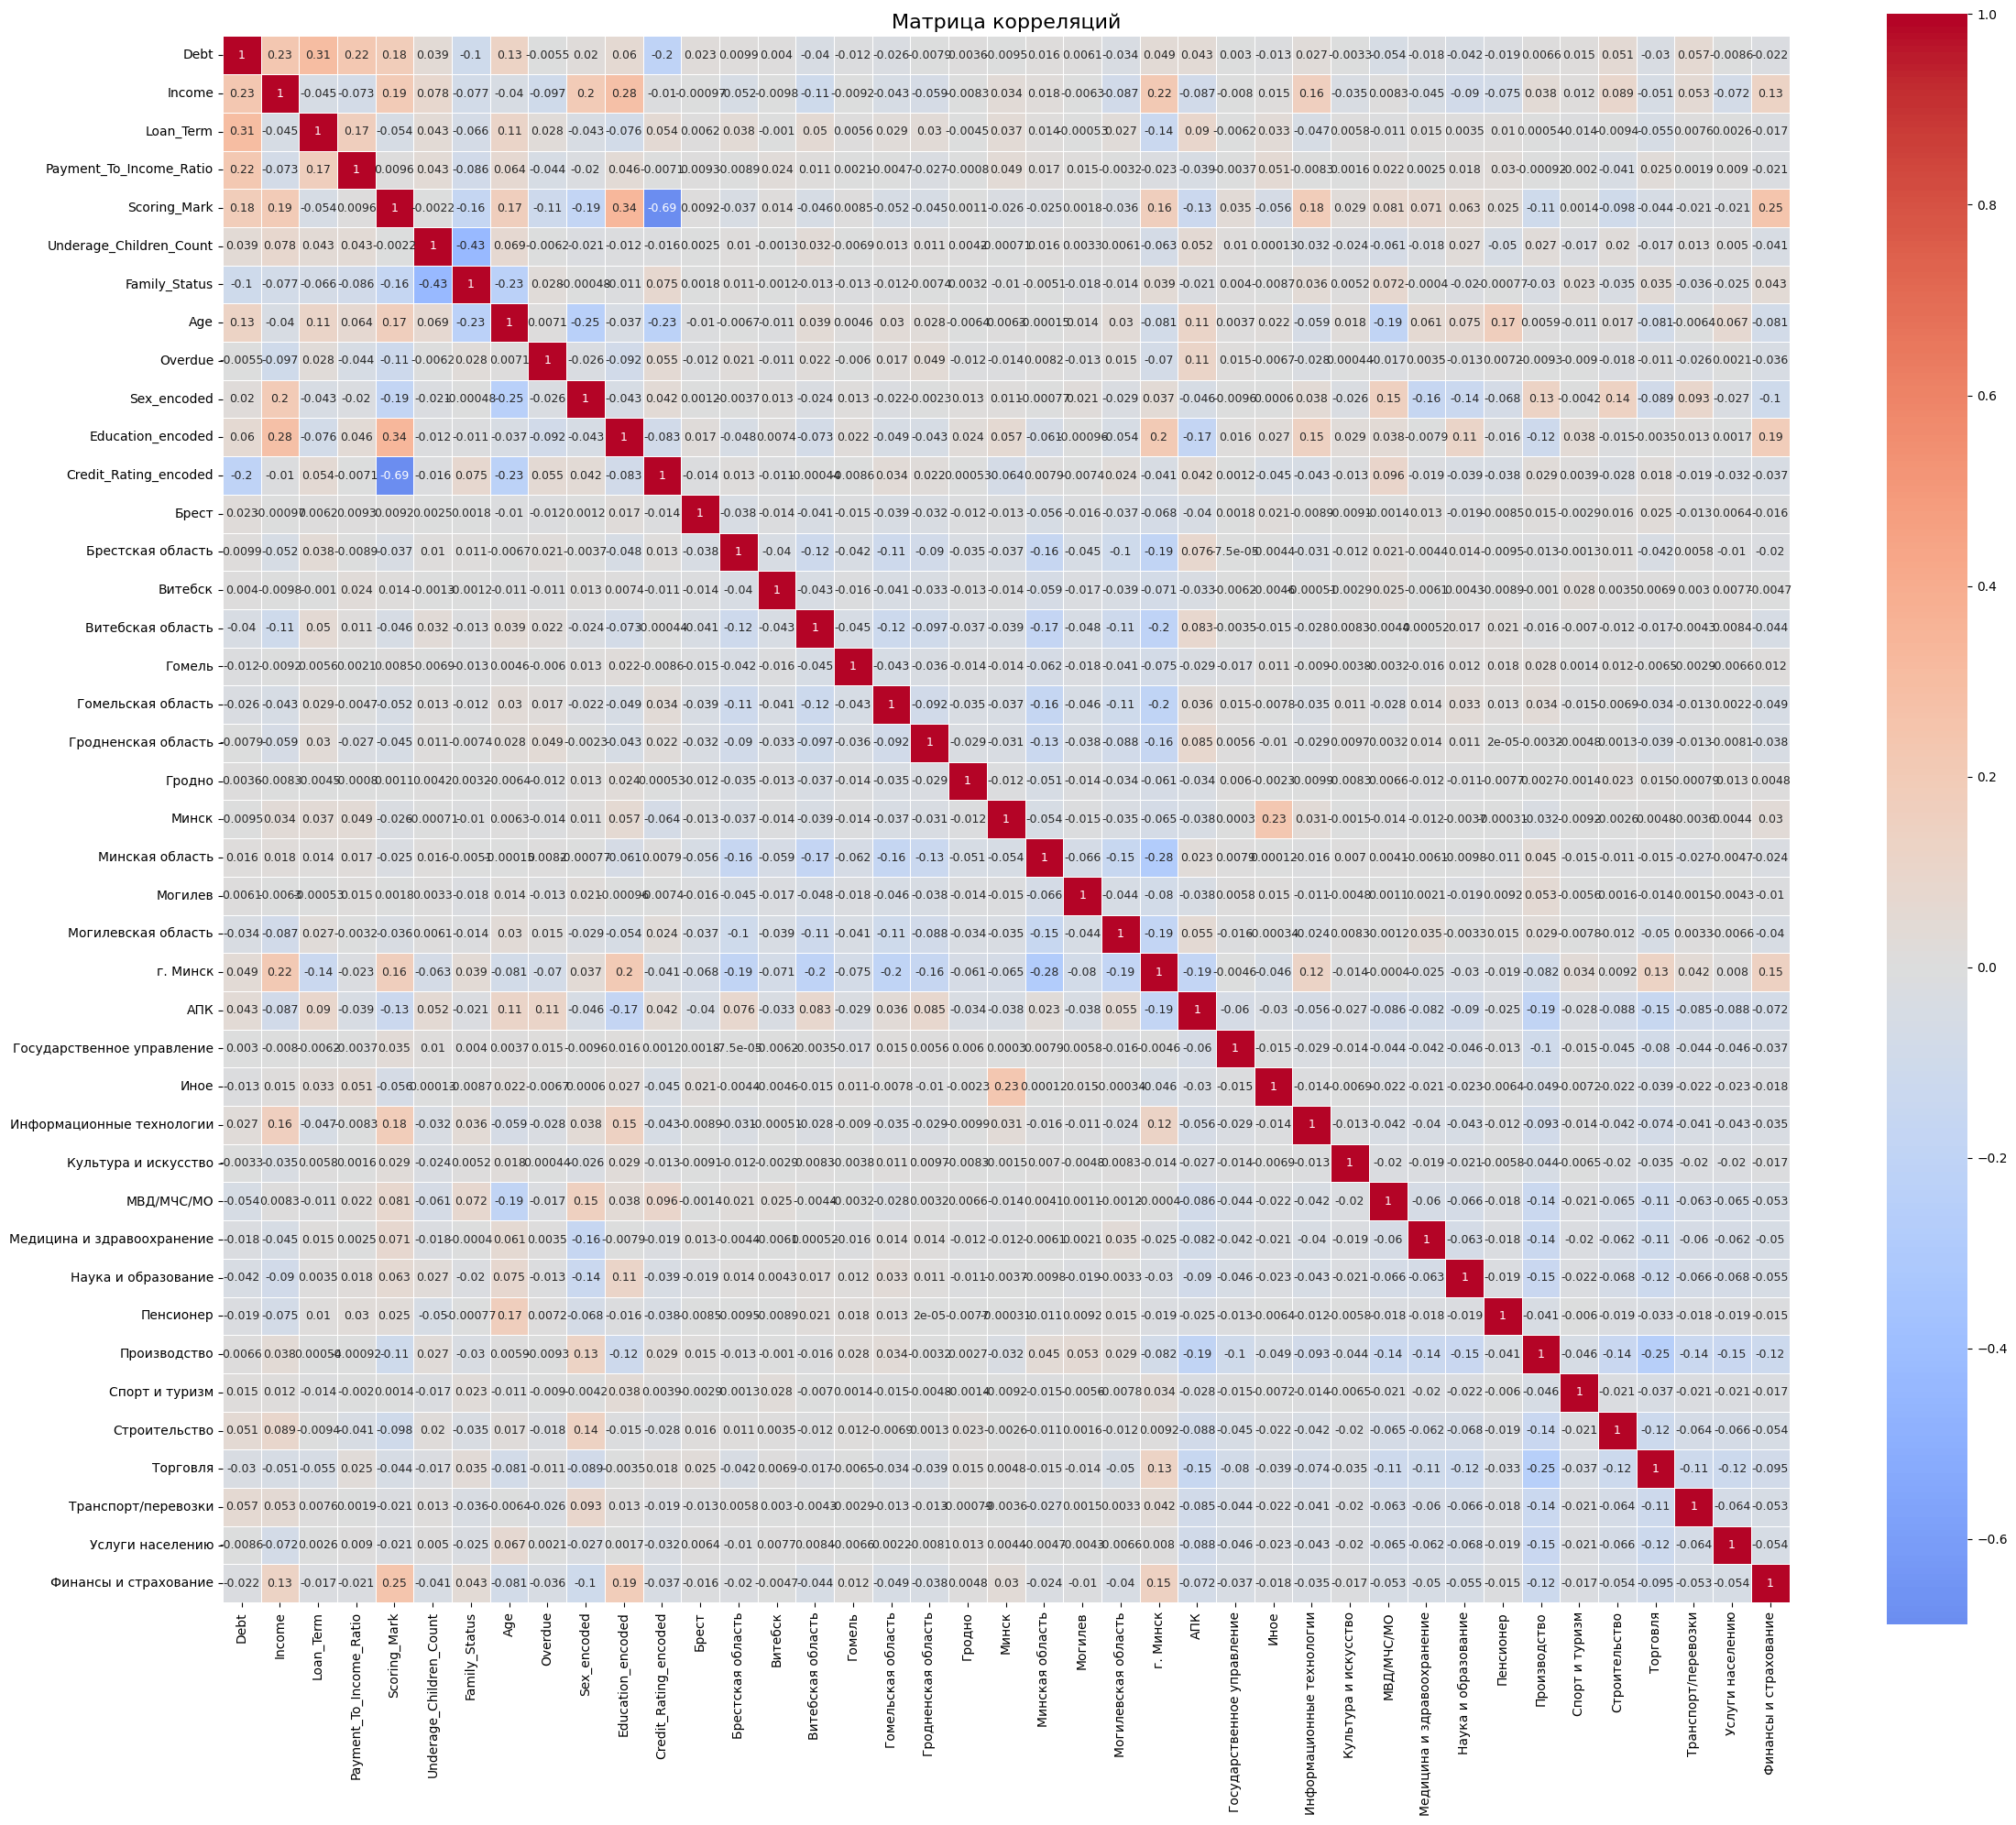

In [52]:
plt.figure(figsize=(24, 20))
corr_matrix = final_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, annot_kws={'size': 9})
plt.title('Матрица корреляций', fontsize=16)
plt.tight_layout()
plt.show()

* Отсутствует мультиколлинеарность

* Признаки достаточно разнообразны

## 4. Построение модели машинного обучения

In [53]:
X = final_data.drop('Overdue', axis=1)
y = final_data['Overdue']

In [54]:
X.shape, y.shape

((15939, 40), (15939,))

In [55]:
y.value_counts()

,count
Overdue,
0,15306
1,633


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12751, 40), (3188, 40), (12751,), (3188,))

### Базовая модель

Была выбрана модель RandomForestClassifier, т.к. может улавливать нелинейные зависимости и лучше справляется с дисбалансом через class_weight='balanced', к тому же не требует масштабирования признаков и устойчива к выбросам


In [57]:
rf_model = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

In [58]:
rf_model.fit(X_train, y_train)
print(rf_model.score(X_test, y_test))

0.9607904642409034


In [59]:
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3061
           1       1.00      0.02      0.03       127

    accuracy                           0.96      3188
   macro avg       0.98      0.51      0.51      3188
weighted avg       0.96      0.96      0.94      3188



Высокое значение **accuracy** (0.96) не отражает реальную ситуацию

Модель научилась только предсказывать мажоритарный класс

- Recall класса 1 = 0.02 - модель находит только 2% реальных просрочек

- Precision класса 1 = 1.00 - но когда предсказывает просрочку, всегда правда


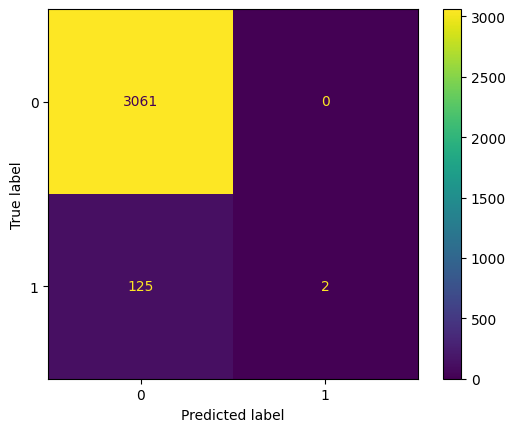

In [60]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

True Negative (TN) = 3001  - правильно предсказанные "без просрочки"

False Positive (FP) = 0     - ложно предсказанные "просрочки"

False Negative (FN) = 125   - пропущенные реальные "просрочки"

True Positive (TP) = 2      - правильно найденные "просрочки"

В датасете сильный дисбаланс классов, поэтому модель RandomForest показывает плохие результаты даже с параметром `class_weight='balanced'`. Есть несколько способов: сэмплирование, подбор оптимального порога и кросс-валидация. Так как дисбаланс в датасете достаточно сильный, я предполагаю, что наиболее эффективным способом будет oversampling

### Random Oversampling

In [61]:
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [63]:
print("\nДанные после Random OverSamppling:\n")
print(f"Размер X_train: {X_train.shape}")
print(f"Распределение классов в y_train:")
print(pd.Series(y_train).value_counts().sort_index())
print(f"Доля класса 1: {y_train.mean():.3f}")


Данные после Random OverSamppling:

Размер X_train: (24489, 40)
Распределение классов в y_train:
Overdue
0    12244
1    12245
Name: count, dtype: int64
Доля класса 1: 0.500


In [64]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

In [65]:
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

Text(0.5, 1.0, '10 наиболее важных признаков')

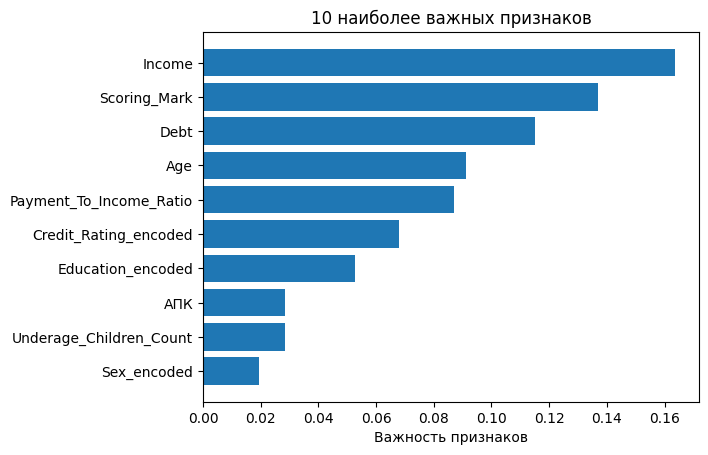

In [66]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns if hasattr(X_train, 'columns') else [f'Feature_{i}' for i in range(X_train.shape[1])],
    'importance': rf_model.feature_importances_
}).sort_values('importance').tail(10)

plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Важность признаков')
plt.title('10 наиболее важных признаков')

In [67]:
rf_model.score(X_test, y_test)

0.9988567695574065

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3062
           1       1.00      1.00      1.00      3061

    accuracy                           1.00      6123
   macro avg       1.00      1.00      1.00      6123
weighted avg       1.00      1.00      1.00      6123



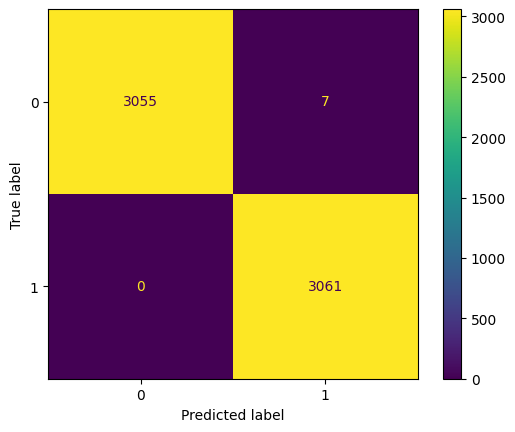

In [69]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

Модель показывает идеальные результаты.

* Высокий Precision класса 1 (100%) - когда модель предсказывает просрочку кредита, она всегда права
* Recall класса 1: 100% - модель теперь находит 100% просрочек
* 100% Высокий F1-score и accuracy говорят о хорошей способности предсказания

Однако модель изредка срабатывает ложно (False Positive - 7)


### Диагностические кривые ROC и PR

In [70]:
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

In [71]:
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [72]:
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

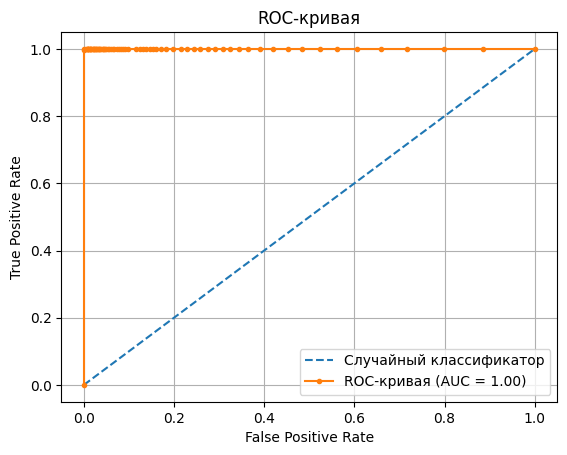

In [73]:
plt.plot([0, 1], [0, 1], linestyle='--', label='Случайный классификатор')
plt.plot(fpr, tpr, marker='.', label=f'ROC-кривая (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.grid(True)
plt.legend()

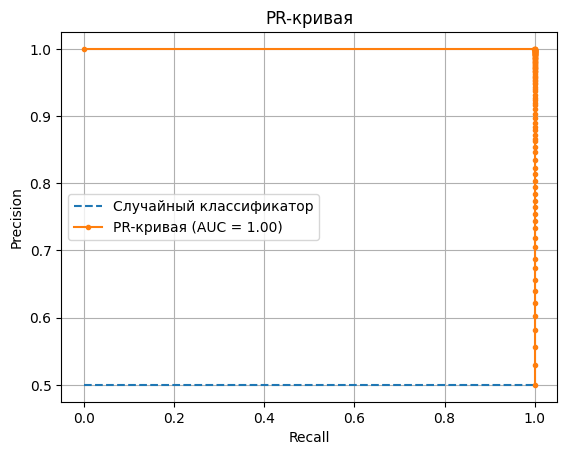

In [74]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Случайный классификатор')
plt.plot(recall, precision, marker='.', label=f'PR-кривая (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-кривая')
plt.legend()
plt.grid(True)
plt.show()

Диагностические кривые также показывают идеальное поведение модели



---



### Вывод
В заключение, модель успешно решает бизнес-задачу предсказания факта просрочки по кредиту с высоким качеством, что способно принести значительную ценность за счет эффективного обнаружения рисков.